In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data_card = pd.read_csv(r'C:\Users\hp\Downloads\archive (3)\Credit_Card_Fraud_Detection.csv')

In [49]:
data_card.head()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
0,0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [17]:
data_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   690 non-null    int64  
 1   Customer_ID  690 non-null    int64  
 2   A_1          690 non-null    int64  
 3   A_2          690 non-null    float64
 4   A_3          690 non-null    float64
 5   A_4          690 non-null    int64  
 6   A_5          690 non-null    int64  
 7   A_6          690 non-null    int64  
 8   A_7          690 non-null    float64
 9   A_8          690 non-null    int64  
 10  A_9          690 non-null    int64  
 11  A_10         690 non-null    int64  
 12  A_11         690 non-null    int64  
 13  A_12         690 non-null    int64  
 14  A_13         690 non-null    int64  
 15  A_14         690 non-null    int64  
 16  class        690 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 91.8 KB


In [19]:
data_card.describe()

,Unnamed: 0,Customer_ID,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,A_11,A_12,A_13,A_14,class
count,690.000000,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,344.500000,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,199.330128,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,172.250000,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,344.500000,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,516.750000,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,689.000000,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [21]:
data_card['class'].value_counts()

class
0    383
1    307
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

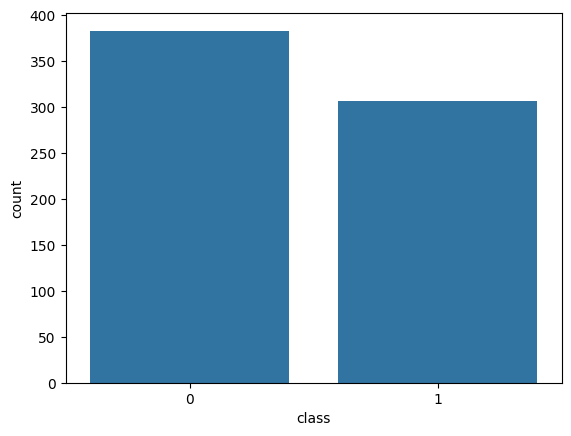

In [23]:
sns.countplot(x='class', data=data_card)

In [24]:
X = data_card.drop(columns='class', axis=1) 
y = data_card['class'].values

In [27]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Importation et entraînement du modèle de régression logistique
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg') # Initialisation du modèle avec un solveur spécifique
lr.fit(X_train, y_train) # Entraîner le modèle sur les données d'entraînement

C:\Users\hp\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.3475839229046926. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [30]:
# Prédire les classes sur les données de test
y_predict = lr.predict(X_test) # Effectuer des prédictions pour l'ensemble de test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_predict) * 100 #Précision en pourcentage
print('Testing accuracy: ', test_accuracy) #Afficher la précision

Testing accuracy:  84.64912280701753


In [31]:
# Matrice de confusion pour analyser les performances
from sklearn.metrics import confusion_matrix
print('Confusion matrix:\n', confusion_matrix(y_test, y_predict)) # Générer la matrice de confusion

Confusion matrix:
 [[126  11]
 [ 24  67]]


In [35]:
# Extraire les valeurs TN, FP, FN, TP de la matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel() # Extraire les 4 composants
print(tn,fp,fn,tp)

126 11 24 67


In [37]:
# Calculer et tracer la courbe ROC pour évaluer les performances du modèle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_predict_probs = lr.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_probs)  # Calcul des métriques ROC
y_test_predict_probs

array([0.97390596, 0.19061602, 0.33994192, 0.94260504, 0.1997948 ,
       0.21145948, 0.72688067, 0.04935977, 0.33841928, 0.02296286,
       0.50593602, 0.03772705, 0.90445276, 0.56332859, 0.17675921,
       0.80277417, 0.56593339, 0.84081768, 0.04366662, 0.97133627,
       0.30730265, 0.12013853, 0.04266047, 0.29163453, 0.20374237,
       0.09388649, 0.16812808, 0.33857199, 0.38484849, 0.05554574,
       0.14697945, 1.        , 0.07456507, 0.14448954, 0.20333157,
       0.93093478, 0.16304594, 0.21186456, 0.06282955, 0.03617594,
       0.06613013, 0.19920069, 0.23516049, 0.07611283, 0.05971673,
       0.62070896, 0.25452363, 0.29097691, 0.06614755, 0.99399041,
       0.36298621, 0.07462522, 0.13668527, 0.9223733 , 0.01133953,
       0.07021742, 0.37042461, 0.91639168, 0.20381875, 0.08515764,
       0.43428253, 0.95453251, 0.77930409, 0.15289341, 0.08321974,
       0.11483585, 0.41137876, 0.88335719, 0.17454402, 0.2159275 ,
       0.66606692, 0.0474839 , 0.14376511, 0.20133408, 0.05912

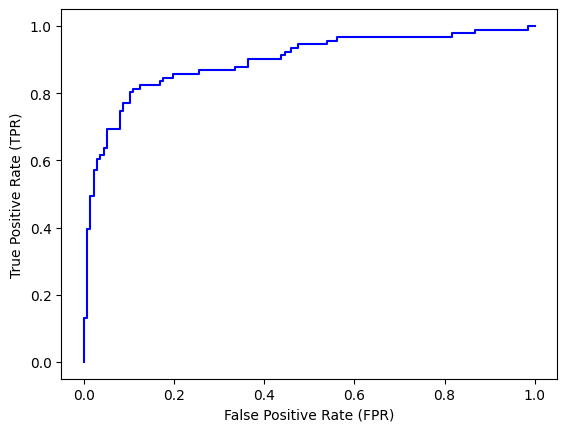

In [39]:
# Tracer la courbe ROC
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [41]:
# Identifier le meilleur seuil à partir de la courbe ROC
from numpy import argmax
best = tpr - fpr # Différence entre TPR et FPR
ix = argmax(best) # Indice du meilleur seuil
best_threshold = thresholds[ix] # Meilleur seuil basé sur l'indice
print('Best Threshold = ', best_threshold) # Afficher le seuil optimal

Best Threshold =  0.411378761312318
